In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# read and view the dataset 
df = pd.read_csv('final2.csv')
df.head()

,count,Date,Close Price_y,pct_change,log_ret_y,edge_count,node_count,degree,log
0,59,8/31/15 0:00,1.25,0.0,0.0,48,95,1.010526,0
1,389,8/31/15 1:00,1.25,0.0,0.0,59,113,1.044248,0
2,106,8/31/15 2:00,1.25,0.0,0.0,57,113,1.008850,0
3,404,8/31/15 3:00,1.25,0.0,0.0,380,669,1.136024,0
4,238,8/31/15 4:00,1.25,0.0,0.0,194,359,1.080780,0


In [4]:
# Check the number of data points in the data set
print(len(df))
# Check the number of features in the data set
print(len(df.columns))
# Check the data types
print(df.dtypes.unique())

21184
9
[dtype('int64') dtype('O') dtype('float64')]


In [5]:
# Check any number of columns with NaN
print(df.isnull().any().sum(), ' / ', len(df.columns))
# Check any number of data points with NaN
print(df.isnull().any(axis=1).sum(), ' / ', len(df))

0  /  9
0  /  21184


In [6]:
# split into features and target variables 
X = df[['count', 'Close Price_y', 'pct_change','edge_count', 'node_count','degree']]
y = df['log_ret_y']


#### Correlations between data points 

In [8]:
# check the correlations . 
#We are interested in correlations with log_ret_y . 

corr = df.corr(method='pearson', min_periods=1)
corr = corr['log_ret_y']
corr

count            0.003547
Close Price_y    0.007360
pct_change       0.999676
log_ret_y        1.000000
edge_count       0.003766
node_count       0.003714
degree           0.006573
log             -0.482986
Name: log_ret_y, dtype: float64

Since log_ret_y and pct_change are very closely related : 

we will not be considering pct_change in our modelling , to see which ones perform the best without it 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

#### split into train and test  

In [10]:
X = df[['count', 'Close Price_y', 'edge_count', 'node_count','degree']]
y = df['log_ret_y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear regression - without scaling

In [11]:
logmodel = LinearRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

Text(0,0.5,'Predicted Y')

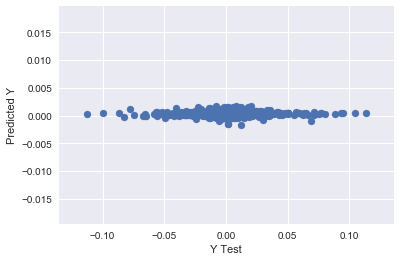

In [12]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [13]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Log Score :',logmodel.score(X_test,y_test))


MAE: 0.00764711708232
MSE: 0.000170946924692
RMSE: 0.013074667288
Log Score : -0.000535252208665


### linear regression - with scaling 

In [14]:
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
print(scaled_features.size)

105920


In [15]:
df_feat = pd.DataFrame(scaled_features)
df_feat.head()
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

In [16]:
logmodel = LinearRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [17]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Log Score :',logmodel.score(X_test,y_test))


MAE: 0.00764711708232
MSE: 0.000170946924692
RMSE: 0.013074667288
Log Score : -0.000535252208665


Text(0,0.5,'Predicted Y')

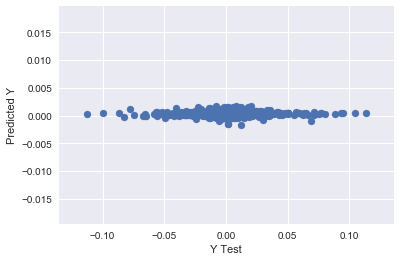

In [343]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

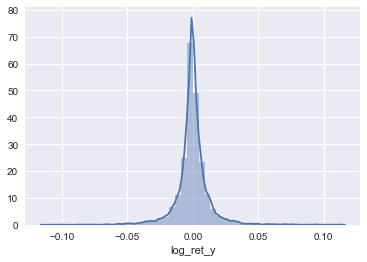

In [344]:
sns.distplot((y_test-predictions),bins=50);

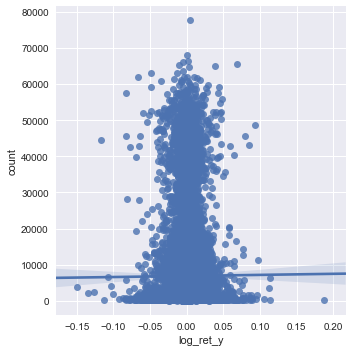

In [345]:
sns.lmplot(x='log_ret_y',y='count',data=df)

### Logistic regression - without scaling 
### have considered the log_return as 3 classes : 0 , +ve log return , -ve log return 

In [346]:
X = df[['count', 'Close Price_y','edge_count', 'node_count','degree']]
y = df['log']

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [348]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [349]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       266
          1       0.47      1.00      0.64      1985
          2       0.40      0.00      0.00      1986

avg / total       0.41      0.47      0.30      4237



In [350]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('accuracy:', sklearn.metrics.accuracy_score(y_test, predictions, normalize=True))

MAE: 0.531980174652
MSE: 0.531980174652
RMSE: 0.729369710539
accuracy: 0.468019825348


### Logistic regression - with scaling 

In [351]:
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
print(scaled_features.size)

105920


In [352]:
df_feat = pd.DataFrame(scaled_features)
df_feat.head()

,0,1,2,3,4
0,-0.627275,-0.546537,-0.606172,-0.603474,-2.281141
1,-0.596869,-0.546537,-0.604908,-0.602358,-1.368567
2,-0.622945,-0.546537,-0.605138,-0.602358,-2.326517
3,-0.595487,-0.546537,-0.568007,-0.567891,1.115087
4,-0.610782,-0.546537,-0.589389,-0.587108,-0.379930


In [353]:
logmodel = LinearRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [356]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 0.554395481342
MSE: 0.364616338075
RMSE: 0.603834694329


Text(0,0.5,'Predicted Y')

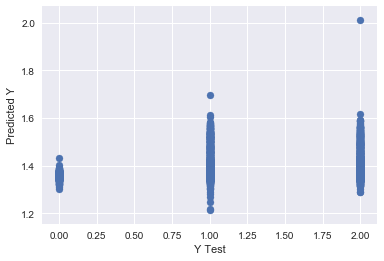

In [357]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

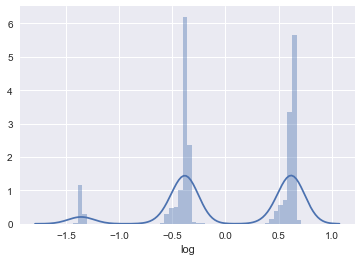

In [358]:
sns.distplot((y_test-predictions),bins=50);

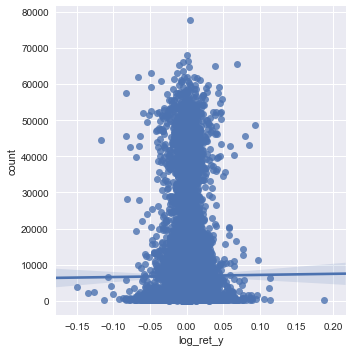

In [359]:
sns.lmplot(x='log_ret_y',y='count',data=df)

### XG boost

In [360]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev1\\mingw64\\bin'


os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [419]:
# read and view the dataset 
df = pd.read_csv('final2.csv')
X = df[['count', 'Close Price_y','edge_count', 'node_count','degree']]
y = df['log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {
    'max_depth': 100,  # the maximum depth of each tree
    'eta': 0.01,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations
bst = xgb.train(param, dtrain, num_round)
bst.dump_model('dump.raw.txt')
preds = bst.predict(dtest)
import numpy as np
best_preds = np.asarray([np.argmax(line) for line in preds])
from sklearn.metrics import precision_score
print(precision_score(y_test, best_preds, average='macro'))
print('____________________________________________________________________')
print('MAE:', metrics.mean_absolute_error(y_test, best_preds))
print('MSE:', metrics.mean_squared_error(y_test, best_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, best_preds)))
print('____________________________________________________________________')
print(classification_report(y_test,best_preds))

0.515251756366
____________________________________________________________________
MAE: 0.536936511683
MSE: 0.589804106679
RMSE: 0.76798704851
____________________________________________________________________
             precision    recall  f1-score   support

          0       0.58      0.57      0.57       266
          1       0.48      0.51      0.50      1985
          2       0.48      0.45      0.47      1986

avg / total       0.49      0.49      0.49      4237



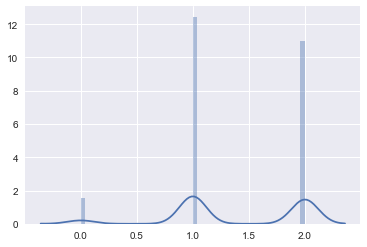

In [389]:
sns.distplot((best_preds),bins=50);

### Decision Tree 

In [390]:
from sklearn import tree
X = df[['count', 'Close Price_y','edge_count', 'node_count','degree']]
y = df['log']

dt = tree.DecisionTreeClassifier(min_samples_split=20, random_state=99)
dt.fit(X, y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [391]:
import sklearn
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    

    with open("dt.dot", 'w') as f:
        sklearn.tree.export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")
features = list(X.columns.values)
visualize_tree(dt, features)

### MLP classifier

In [418]:
X = df[['count', 'Close Price_y','edge_count', 'node_count','degree']]
y = df['log']
X=X.values.tolist()
y=y.values.tolist()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5),max_iter=150000)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predictions))
print('____________________________________________________________________')
print(classification_report(y_test,predictions))
print('____________________________________________________________________')
print('accuracy:', sklearn.metrics.accuracy_score(y_test, predictions, normalize=True))

[[  22  296   42]
 [  14 2405  129]
 [   7 2269  112]]
____________________________________________________________________
             precision    recall  f1-score   support

          0       0.51      0.06      0.11       360
          1       0.48      0.94      0.64      2548
          2       0.40      0.05      0.08      2388

avg / total       0.45      0.48      0.35      5296

____________________________________________________________________
accuracy: 0.479418429003


## Smaller dataset - don't consider the earlier days of Ethereum , when price was pretty standard and did not fluctuate a lot

In [392]:
df1 = df[df['Close Price_y']>30]

In [393]:
X = df1[['count', 'Close Price_y','edge_count', 'node_count','degree']]
y = df1['log']

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [403]:
# linear regression without scaling 
logmodel = LinearRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Log Score :',logmodel.score(X_test,y_test))
print('____________________________________________________________________')

MAE: 0.502412685324
MSE: 0.256770436757
RMSE: 0.50672520833
Log Score : -0.00140614886287
____________________________________________________________________


In [405]:
# linear regression with scaling 
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
print(scaled_features.size)
df_feat = pd.DataFrame(scaled_features)
df_feat.head()
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2, random_state=42)
logmodel = LinearRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Log Score :',logmodel.score(X_test,y_test))
print('____________________________________________________________________')


37960
MAE: 0.501204133214
MSE: 0.2550094353
RMSE: 0.504984589171
Log Score : -0.00658769792066
____________________________________________________________________


In [406]:
# logistic regression 
X = df1[['count', 'Close Price_y','edge_count', 'node_count','degree']]
y = df1['log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('accuracy:', sklearn.metrics.accuracy_score(y_test, predictions, normalize=True))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         5
          1       0.55      0.81      0.66       836
          2       0.44      0.19      0.26       678

avg / total       0.50      0.53      0.48      1519

MAE: 0.472021066491
MSE: 0.47465437788
RMSE: 0.688951651337
accuracy: 0.529295589203


C:\Users\raosa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [409]:
# logistic regression with scaling 
X = df1[['count', 'Close Price_y','edge_count', 'node_count','degree']]
y = df1['log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
print(scaled_features.size)
df_feat = pd.DataFrame(scaled_features)
df_feat.head()
logmodel = LinearRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


37960
MAE: 0.501204133214
MSE: 0.2550094353
RMSE: 0.504984589171


In [413]:
#xgboost
import xgboost as xgb
X = df1[['count', 'Close Price_y','edge_count', 'node_count','degree']]
y = df1['log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X=X.values.tolist()
y=y.values.tolist()

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {
    'max_depth': 100,  # the maximum depth of each tree
    'eta': 0.01,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations
bst = xgb.train(param, dtrain, num_round)
bst.dump_model('dump.raw.txt')
preds = bst.predict(dtest)
import numpy as np
best_preds = np.asarray([np.argmax(line) for line in preds])
from sklearn.metrics import precision_score

print(precision_score(y_test, best_preds, average='macro'))
print('____________________________________________________________________')
print('MAE:', metrics.mean_absolute_error(y_test, best_preds))
print('MSE:', metrics.mean_squared_error(y_test, best_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, best_preds)))
print('____________________________________________________________________')
print(classification_report(y_test,best_preds))


0.329368930069
____________________________________________________________________
MAE: 0.505595786702
MSE: 0.51086240948
RMSE: 0.71474639522
____________________________________________________________________
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         5
          1       0.55      0.53      0.54       836
          2       0.44      0.47      0.45       678

avg / total       0.50      0.50      0.50      1519



C:\Users\raosa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\raosa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [420]:
X = df1[['count', 'Close Price_y','edge_count', 'node_count','degree']]
y = df1['log']
X=X.values.tolist()
y=y.values.tolist()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5),max_iter=150000)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predictions))
print('____________________________________________________________________')
print(classification_report(y_test,predictions))
print('____________________________________________________________________')
print('accuracy:', sklearn.metrics.accuracy_score(y_test, predictions, normalize=True))

[[  0   4   0]
 [  0 907  54]
 [  0 878  55]]
____________________________________________________________________
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         4
          1       0.51      0.94      0.66       961
          2       0.50      0.06      0.11       933

avg / total       0.50      0.51      0.39      1898

____________________________________________________________________
accuracy: 0.506849315068


C:\Users\raosa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
